In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from textblob import TextBlob

In [3]:
comments = pd.read_csv("./data/GBcomments.csv", error_bad_lines = False)

b'Skipping line 113225: expected 4 fields, saw 5\n'
b'Skipping line 158379: expected 4 fields, saw 7\nSkipping line 241590: expected 4 fields, saw 5\nSkipping line 245637: expected 4 fields, saw 7\n'
b'Skipping line 521402: expected 4 fields, saw 5\n'


In [4]:
comments.head()

,video_id,comment_text,likes,replies
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0


In [5]:
text = comments.iloc[0].comment_text
text

"It's more accurate to call it the M+ (1000) because the price is closer than calling it the X (10)."

In [6]:
TextBlob(text).sentiment.polarity

0.45000000000000007

In [11]:
comments.shape

(718452, 4)

In [14]:
comments.isna().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

In [13]:
comments.dropna(inplace= True)

In [16]:
polarity = []
for comment in comments["comment_text"]:
    polarity.append(TextBlob(comment).sentiment.polarity)

In [17]:
comments["polarity"] = polarity

In [19]:
comments.head()

,video_id,comment_text,likes,replies,polarity
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0,0.45
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0,0.00
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0,0.00
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0,0.00
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,1.00


Representación de Wordcloud de
Sentimientos

In [20]:
comments_positive = comments[comments["polarity"] == 1]

In [22]:
comments_positive.head()

,video_id,comment_text,likes,replies,polarity
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,1.0
26,jt2OHQh0HoQ,The best thing to ever happen to iPhone,0,2,1.0
80,jt2OHQh0HoQ,Apple is always awesome \n\nhttps://youtu.be/r...,0,1,1.0
158,YPVcg45W0z4,das a lot of edditing you have done there ... ...,0,0,1.0
175,YPVcg45W0z4,Welcome to the Scandiworld!,0,0,1.0


In [24]:
comments_positive.shape

(20400, 5)

In [27]:
from wordcloud import WordCloud,STOPWORDS

In [28]:
stopwords = set(STOPWORDS)

In [41]:
total_comments = " ".join(comments_positive["comment_text"])

In [43]:
wordcloud = WordCloud(width = 1000, height= 500, stopwords= stopwords).generate(total_comments)

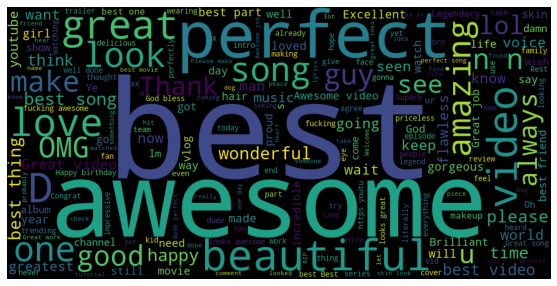

In [47]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("./images/WordCloud.png")

In [48]:
comments_negative = comments[comments["polarity"] == -1]

In [49]:
total_comments_neg = " ".join(comments_negative["comment_text"])

In [50]:
wordcloud = WordCloud(width = 1000, height= 500, stopwords= stopwords).generate(total_comments_neg)

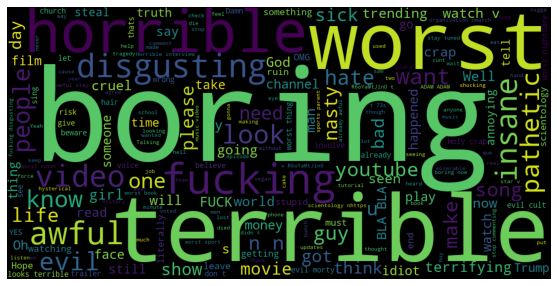

In [51]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("./images/WordCloud_neg.png")